# Line Plots

Já vimos gráficos de linha algumas vezes, mas eles se pareciam muito com gráficos de dispersão.

Um gráfico de linha é criado com a função `plot` e renderiza várias séries diferentes de pontos de dados e conecta cada ponto em uma série com uma linha. Vamos pular direto.
Portanto, há algumas coisas novas sobre isso em relação aos gráficos de dispersão.

- Primeiro, demos apenas valores de eixos y para nossa chamada de plotagem, sem valores de eixos x. Em vez disso, a função plot foi inteligente o suficiente para descobrir que o que queríamos era usar o índice da série como o valor de x. O que é bastante útil quando você deseja fazer plotagens rápidas.
- Em segundo lugar, vemos que o gráfico identifica isso como duas séries de dados e que as cores dos dados da série são diferentes, incluindo os pontos de dados e as linhas entre os pontos de dados. Isso é diferente do gráfico de dispersão, que exige que rotulemos as linhas diretamente.

In [1]:
import matplotlib.pyplot as plt

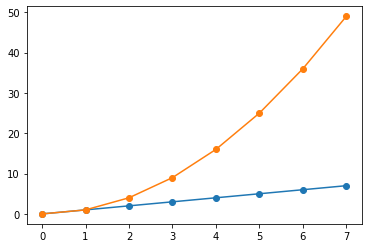

In [13]:
# We can use numpy to use a linear series of data points one through eight. We'll 
# also create a number of quadratically increasing values as the second series. 
# Remember that you can use broadcasting in numpy to do this efficiently.
import numpy as np

linear_data = np.array([0,1,2,3,4,5,6,7])
exponential_data = linear_data**2

# This time I'll use the mini formatting language to describe how I want the markers
# and lines to be rendered. The -o means to use a solid line with circle markers.
# Note that I'm passing the data followed by the formatting for each series, so
# we'll see the result as a two data series, the linear one at the bottom and the quadratic 
# one at the top.
plt.figure()
plt.plot(linear_data, '-o', exponential_data, '-o');

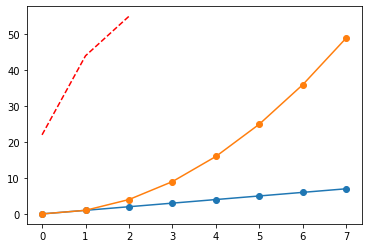

In [14]:
# It's pretty easy to extend this and add some arbitrary new line, this time I'll
# use --r which says to plot a dashed line in red.
plt.plot(linear_data, '-o', exponential_data, '-o')
plt.plot([22,44,55], '--r');

Espere, você notou o que eu fiz lá? Eu não chamei `plt.figure()`! Por padrão, a interface de script do pyplot chamará plt.gcf() quando você tentar fazer algo. Se nenhuma figura for definida, ele criará uma nova para você. Da maneira como o JupyterLab é configurado por padrão, ele fechará automaticamente uma figura após a execução de cada célula, o que significa que o pyplot criará uma nova figura para nós para cada célula. Esta é uma grande economia de tempo -- bom por `plt.figure()`!

Podemos usar as funções de eixos regulares criando rótulos para os eixos e para a figura como um todo. E podemos criar uma lenda também. Mas como não rotulamos os pontos de dados como fizemos com o gráfico de dispersão, precisamos criar entradas de legenda quando adicionamos a própria legenda.

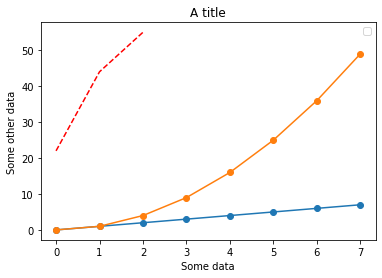

In [15]:
# Create some meaningful labels
plt.xlabel('Some data')
plt.ylabel('Some other data')
plt.title('A title')
# Add a legend with legend entries (because we didn't have labels when we plotted the data series)
plt.legend(['Baseline', 'Competition', 'Us'])
plt.plot(linear_data, '-o', exponential_data, '-o')
plt.plot([22,44,55], '--r');

Este é um bom momento para apresentar a função *preencher entre* do matplotlib. Agora, esta função não é específica para gráficos de linha, mas você pode vê-la comumente usada com esses gráficos, então vou apresentá-la neste contexto. Vamos imaginar que queremos destacar a diferença entre as curvas verde e azul. Poderíamos dizer aos Axes para pintar uma cor entre essas séries usando a função fill between.

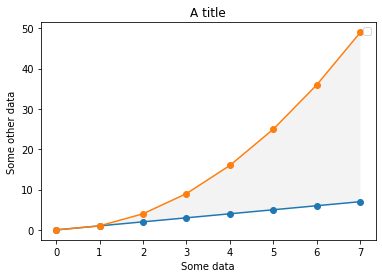

In [16]:
# Let's add our labels and legend just as before
plt.xlabel('Some data')
plt.ylabel('Some other data')
plt.title('A title')
plt.legend(['Baseline', 'Competition', 'Us'])
plt.plot(linear_data, '-o', exponential_data, '-o')

# Now we need to get the current axes object, and call fill_between. We didn't specify any x 
# values in our call to plot, so we'll just use the same range of data points it's already using. 
# Then we'll put in our lower bounds and our upper bounds along with the color we want painted 
# and for fun I'll include a transparency value. And that's all there is to it.
plt.gca().fill_between(range(len(linear_data)), 
                       linear_data, exponential_data, 
                       facecolor='lightgray', 
                       alpha=0.25);

Vamos tentar trabalhar com datas!

É mais provável que você tenha uma série de valores x e valores y que deseja plotar. Muitas vezes, com gráficos de linha, isso vem na forma de data e hora nos eixos x. Vamos mudar nosso eixo x para uma série de oito instâncias de data e hora em intervalos de um dia.

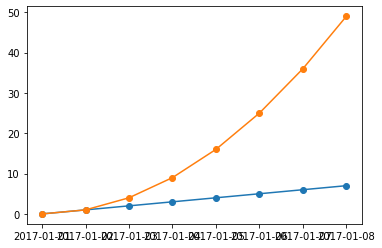

In [17]:
# Vou usar a função de arranjo NumPy que você viu anteriormente é realmente útil para gerar
# algumas datas de amostra para nós. Podemos pedir um arranjo de datas em intervalos diários apenas
# fornecendo as datas de início e término.
observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')

# Agora podemos plotar novamente nossos dados lineares e exponenciais em relação a esse conjunto de datas.
plt.plot(observation_dates, linear_data, '-o',  observation_dates, exponential_data, '-o');

Isso produz uma figura de aparência bastante decente com os dados que queremos. Mas as datas se sobrepõem fortemente. Agora, há algumas coisas que poderíamos fazer aqui. Por exemplo, tudo é de 2017. Portanto, poderíamos iterar e alterar os rótulos removendo o ano e, em seguida, adicionar um rótulo de eixo x que esclarece que é tudo para o ano de 2017. Isso é bastante razoável, mas eu queria mostrar a você alguns recursos de como o matplotlib usa texto.

Existem muitas propriedades interessantes do objeto axes e você deve usar algumas delas na atribuição. Por exemplo; você pode obter as linhas de grade, os locais dos ticks principais e secundários e assim por diante. Assim como todos os artistas, um axes tem um monte de filhos que também são artistas. Na verdade, se você está acompanhando esta palestra no bloco de anotações do JupyterLab, por que simplesmente não pausa o vídeo e executa a função `rec_gc` que escrevemos anteriormente para explorar que tipo de artistas o objeto x axes realmente contém.

O que eu quero mostrar é que você pode acessar o texto dos tiques usando a função get tick labels. Cada um dos rótulos de marcação é um objeto de texto que é um artista. Isso significa que você pode usar várias funções de artista diferentes e uma específica para o texto é a função de rotação definida, que altera a rotação com base em graus. Vamos percorrer os rótulos dos eixos e mudar isso.

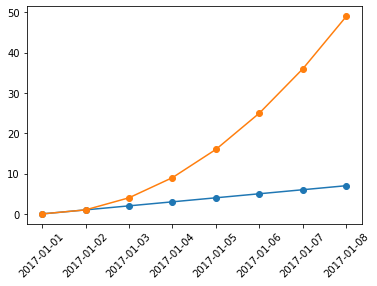

In [18]:
# Our plot data
observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')
plt.plot(observation_dates, linear_data, '-o',  observation_dates, exponential_data, '-o');

# Now lets get a variable which points at the x axis
x = plt.gca().xaxis

# Now we can iterate through each one and rotate the tick labels
for item in x.get_ticklabels():
    item.set_rotation(45)

Vamos adicionar de volta em nossos títulos

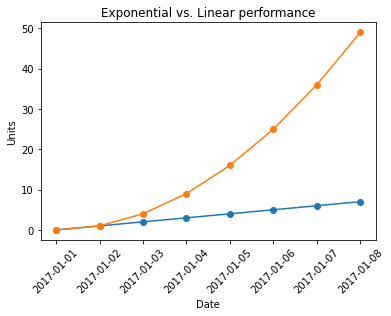

In [19]:
# Merging code from previous
observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')
plt.plot(observation_dates, linear_data, '-o',  observation_dates, exponential_data, '-o');

x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(45)
    

# Change our labels
ax = plt.gca()
ax.set_xlabel('Date')
ax.set_ylabel('Units')
ax.set_title('Exponential vs. Linear performance');

E lá vamos nós, datas maravilhosamente legíveis no matplotlib. E quando falamos de texto e legibilidade, deixe-me compartilhar dois outros insights, o primeiro lidando com equações. O Matplotlib tem uma conexão bastante forte com o LaTeX, uma linguagem de configuração de tipos usada por matemáticos e cientistas. Isso significa que você pode usar um subconjunto de LaTeX diretamente em seus rótulos, então o matplotlib os renderizará como equações. Aqui, por exemplo, podemos definir o título dos eixos para que haja um x ao quadrado diretamente nele. Fazemos isso escapando para o modo matemático LaTeX com cifrões. Observe que isso funciona independentemente de você ter o LaTeX instalado. Mas com uma instalação completa do LaTeX, você tem um controle significativo sobre a formatação do texto.

Para o segundo insight, quero falar sobre o tamanho da figura em si. Por que estamos olhando para pequenas figuras de selos postais? Bem, isso depende do tamanho e da resolução da tela, mas podemos dizer ao matplotlib que queremos que a figura tenha um determinado tamanho passando os parâmetros quando fazemos a figura pela primeira vez. Aqui vou especificá-lo em polegadas, mas existem vários outros métodos de dimensão que você pode usar.

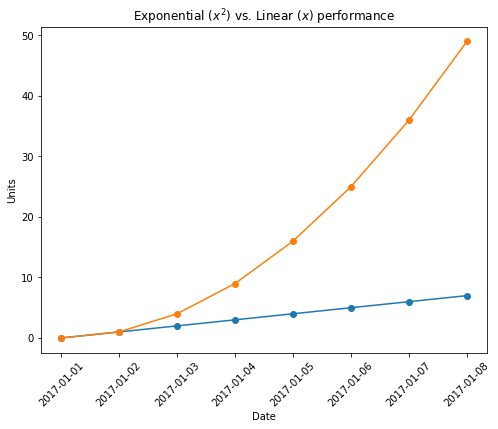

In [20]:
# By creating a new figure with the figsize parameter I'm telling matplotlib
# that I want an 8x6 inch figure at 300 DPI
plt.figure(figsize=(8,6))

# Now we can bring in our plotting details from before
observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')
plt.plot(observation_dates, linear_data, '-o',  observation_dates, exponential_data, '-o');
x = plt.gca().xaxis
# rotate the tick labels for the x axis
for item in x.get_ticklabels():
    item.set_rotation(45)
ax = plt.gca()
ax.set_xlabel('Date')
ax.set_ylabel('Units')

# And finally, I'll add in some mathematical expressions which you can do 
# in any text element
ax.set_title("Exponential ($x^2$) vs. Linear ($x$) performance");

Acho que foi uma visão bastante bem-sucedida dos fundamentos do matplotlib - desde a visão geral da arquitetura até a criação de gráficos limpos que poderíamos incluir em um relatório ou apenas em nossas próprias explorações de dados. Quero mostrar mais um esta semana na próxima palestra, o gráfico de barras.